<a href="https://colab.research.google.com/github/Nouman-wisal/pytorch/blob/main/03_pytorch_computer_vision_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Vision libraries for Data sets

*   Torchvision.datasets -- get datasets and data loading functions for computer vision here

*   Torchvision.models - get pretrained computer vision models that you can leverage for your own problems
*   Torchvision.transform- functions for manipulating your vision data (images) to be suitable for use with an ML model

###general pytorch libraries

*   torch.utils.data.Dataset- Base dataset class for PyTorch.
*   torch.utils.data.DataLoader - Creates a Python iterable over a dataset





In [ ]:
# import Pytorch

import torch
from torch import nn

# import torchvisision

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# matplotlib

import matplotlib.pyplot as plt


print(torch.__version__, torchvision.__version__)

2.6.0+cu124 0.21.0+cu124


#Importing Trainig & Testing data from `torchvision.datasets`

In [ ]:
                                                  # Importing trainig data in tensor format with label in pil format

# it comes with label inside and have to unpack it like "train_image, train_label= Train_data[0]"   <----- IMPORTANT

Train_data= torchvision.datasets.FashionMNIST(
  root="data",
  train=True,
  download=True,

  transform= torchvision.transforms.ToTensor(),
  target_transform=None

  )

                                                  # Importing trainig data in tensor format with label in pil forma
Test_data= datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,

    transform= ToTensor(),
    target_transform=None

    )

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 204kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.78MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 21.3MB/s]


In [ ]:
# checking sample length

print(len(Train_data), len(Test_data),'\n')

print(Train_data,'\n\n'), print(Test_data,'\n')

60000 10000 

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 


Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor() 



(None, None)

#Unpacking & Analyzing the data

In [ ]:
# Unpacking data and it's label plus class_name

# image, label= Test_data[0]
image, label= Train_data[0]
class_names= Train_data.classes
class_names[0]

print( f'image_shape: {image.shape} \nlabel_num: {label} \n and label_name: {class_names[label]} \n\n ' )
print(f'All the 9 classes:',class_names, '\n')
print(f'training image(in tensor format):\n\n{image}, \n\n training label:{label}')


image_shape: torch.Size([1, 28, 28]) 
label_num: 9 
 and label_name: Ankle boot 

 
All the 9 classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

training image(in tensor format):

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
 

In [ ]:
#                                          Repeating, used it above as well ------------> imp

# each class(0 to 9 total 10) comes with name of that class(t,shirt,shoes,etc....)

class_name= Train_data.classes
class_name, class_name[0]

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 'T-shirt/top')

In [ ]:
# let's see with label number side by side

class_to_idx= Train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
# This shows all the labels in your training set & testing set (e.g. [0, 1, 4, 0, 7, ...])

Train_data.targets, Test_data.targets

(tensor([9, 0, 0,  ..., 3, 0, 5]), tensor([9, 2, 1,  ..., 8, 1, 5]))

#Visualizing the data(image & label)

image shape: torch.Size([1, 28, 28])
label_num 9
label name(class) Ankle boot 



Text(0.5, 1.0, 'image format of image tensor')

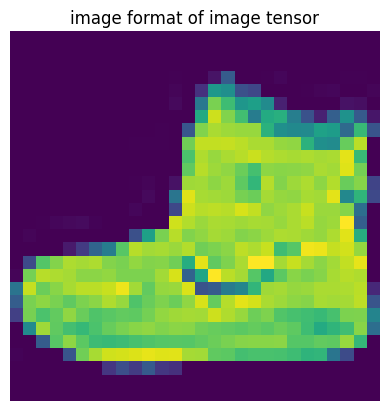

In [ ]:
# unpacking image,label and classname
image, label= Train_data[0]
class_name= Train_data.classes

print('image shape:',image.shape)
print('label_num',label)                             #label is int and int dont have shapes
print('label name(class)', class_name[label],'\n')

# plottting the image
plt.imshow(image.squeeze())
plt.axis(False)
plt.title('image format of image tensor')

In [ ]:
import pandas as pd

# checking if data is balanced or not

df= pd.DataFrame({
    'targets/label': Train_data.targets,
})

df['targets/label'].value_counts().sort_index()  # Data is balanced & has 10 clasees <-------------- IMPORTANT <-------------------- IMPORTANT <--------------

,count
targets/label,
0,6000
1,6000
2,6000
3,6000
4,6000
5,6000
6,6000
7,6000
8,6000


#Plotting and Visualizing 16 random training images with class names

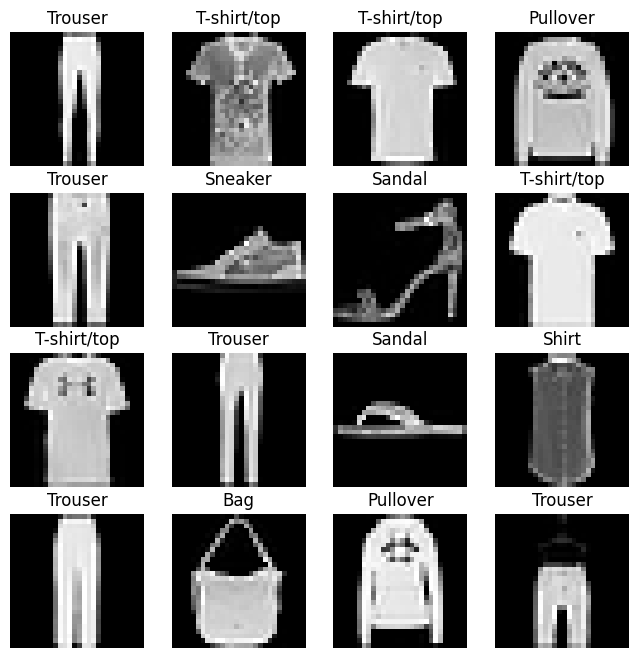

In [ ]:

"""                                             This will show 16 random images with it's title(class anme)                                                           """


# Create a blank figure with a 9x9 inch size to hold the subplots (images)
fig= plt.figure(figsize=(8,8))

# Loop 16 times to show 16 images (in a 4x4 grid)
for i in range(1,17):
  # Pick a random index from the training dataset of 60,000 samples
  random_index= torch.randint(0, len(Train_data), size=[1]).item()

  # Get the image and label at that random index
  image, label= Train_data[random_index]
  class_name= Train_data.classes                 # <----- class names list

  #  Add a new subplot (small plot box) to the 4x4 grid at position i
  fig.add_subplot(4, 4, i)
  plt.imshow(image.squeeze(), cmap='grey')
  plt.title(class_name[label])
  plt.axis(False)




#Prepare Dataloader


Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically,it turns our data into batches (or mini-batches).

it loads the data into small batches to be passed through model easily in batches

In [ ]:
from torch.utils.data import DataLoader

#dataloader create mini batches of dataset like 32
batch_size= 32

# Turn datasets into iterables (batches)
train_dataloader= DataLoader(
    dataset= Train_data,
    batch_size= batch_size,
    shuffle=True,

    num_workers=0,
    pin_memory=False
)

# Turn datasets into iterables (batches)
test_dataloader= DataLoader(
    dataset=Test_data,
    batch_size=batch_size,
    shuffle=False,

    num_workers= 0,
    pin_memory=False
)

print('\n',train_dataloader,'\n', test_dataloader)

len(train_dataloader), batch_size, len(test_dataloader), batch_size

(1875, 32, 313, 32)

In [ ]:
#  checking what's inside both train & test dataloader since they're made of datasets
# print(next(iter(train_dataloader)))   # ---> this will give 1st batch(32) of image(feature) & label
# unpacking train_dataloader and test_dataloader like we did before with fashionmnist dataset

train_feature_batch, train_label_batch= next(iter(train_dataloader))

test_feature_batch, test_label_batch= next(iter(test_dataloader))

# check shape of batch bcz it includes batch size.
train_feature_batch.shape, train_label_batch.shape,  test_feature_batch.shape, test_label_batch.shape

(torch.Size([32, 1, 28, 28]),
 torch.Size([32]),
 torch.Size([32, 1, 28, 28]),
 torch.Size([32]))

image shape: torch.Size([1, 28, 28])
label no 7


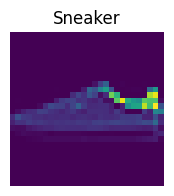

In [ ]:
# taking a sample from train batch with label and visualizing it

random_idx= torch.randint(0, len(train_feature_batch), size=[1]).item()

image , label= train_feature_batch[random_idx], train_label_batch[random_idx]

plt.figure(figsize=(2,2))
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis(False)

print('image shape:',image.shape)
print('label no',label.item())

# How flatten works

In [ ]:
# checking how flatten works
flattenModel= nn.Flatten()

batchh= train_feature_batch[0]
# forward pass
flatte_output= flattenModel(batchh)

print(batchh.shape)
print(flatte_output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


#Building the model

In [ ]:
len(class_names)

10

In [ ]:
                                                                # Building the Model

class FashionMNISTModelV0(nn.Module):
  def __init__(self, input, hidden_neurons, output):
    super().__init__()

    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input, out_features=hidden_neurons),
        nn.Linear(in_features=hidden_neurons, out_features=output)
    )

  def forward(self, x):
    return self.layer_stack(x)




In [ ]:
model_0= FashionMNISTModelV0(input=28*28, hidden_neurons=10, output=len(class_names)).to('cpu')

model_0
# model_0.state_dict()

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
# just checking if model is working fyi always check with infefence mode and eval()

dummy_x= torch.rand([1,1,28,28])
print(dummy_x.shape,'\n')

y_logitsss=model_0( dummy_x)
y_logitsss

torch.Size([1, 1, 28, 28]) 



tensor([[-0.2264, -0.2041, -0.3672,  0.1725, -0.2665, -0.3214,  0.3160, -0.4636,
         -0.0124, -0.2868]], grad_fn=<AddmmBackward0>)

#Loss function , optimizer and accuracy function(bcz data is balanced)

In [ ]:
# LOSS FUNCTION plus if data was imbalanced you coud add 1D tensor as weight here
loss_fn= nn.CrossEntropyLoss()

# Optimizer                                         add L2(weight_decay) here if model overfitting
# optimizer= torch.optim.Adam(params=model_0.parameters(), lr=0.1)

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# accuracy functiom

from pathlib import Path
import requests

if Path('helper_function.py').is_file():
  print('already downloaded')
else:
  print('downloading')
  request= requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')

  with open('helper_function.py', 'wb') as f:
    f.write(request.content)

    print('downloaded')

# accuracy functiom
from helper_function import accuracy_fn

downloading
downloaded


In [ ]:
from timeit import  default_timer as Timer

def noticetime(start, end, device):
  total_time= end- start
  print(f'total time on {device} is {total_time:.2f} seconds' )
  return total_time

###Creating a training loop and training a model on batches of da





In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
start_time=Timer()

epochs=3

for epoch in tqdm(range(epochs), desc= 'model trainig'):
  print(f'epoch:{epoch}\n-------')

# all the loss will accumulate here from all the batches
  train_loss , train_acc= 0, 0

  for batch_idx ,(x_train, y_train) in (enumerate(train_dataloader)):
    model_0.train()

    # forward pass
    train_logits= model_0(x_train)
    train_preds= torch.softmax(train_logits, dim=1).argmax(dim=1)

    # calculate loss
    loss= loss_fn(train_logits, y_train)
    train_loss += loss    #------------------------>>>> this will add loss value to tain loss above ----> imp

    # accuracy
    acc= accuracy_fn(y_train, train_preds)
    train_acc += acc

    # zerograd, backpropagation, weight update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch_idx % 400 == 0:
      print(f' looked at {batch_idx * len(x_train)}/{len(train_dataloader.dataset)} samples')

  # Divide total train loss by length of train dataloader
  train_loss = train_loss/len(train_dataloader)
  train_acc= train_acc/ len(train_dataloader)

  #                                         evaluating the model
  test_loss, test_acc= 0, 0

  model_0.eval()
  with torch.inference_mode():
    for x_test, y_test in test_dataloader:

      # forward pass
      test_logits= model_0(x_test)
      test_preds= torch.softmax(test_logits, dim=1).argmax(dim=1)

      # calculate loss
      loss1=loss_fn(test_logits, y_test)
      test_loss += loss1

      # accuracy
      accu1= accuracy_fn(y_test, test_preds)
      test_acc += accu1

  test_loss= test_loss/len(test_dataloader)
  test_acc= test_acc/len(test_dataloader)

  print(f'\nepoch:{epoch} | trainloss:{train_loss:.4f} | testloss:{test_loss:.4f} | trainaccuracy:{train_acc:.2f} | testaccuracy:{test_acc:.2f}')

end_time= Timer()
notice_time1= noticetime(start_time, end_time, 'cpu')


model trainig:   0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
-------
 looked at 0/60000 samples
 looked at 12800/60000 samples
 looked at 25600/60000 samples
 looked at 38400/60000 samples
 looked at 51200/60000 samples

epoch:0 | trainloss:0.5940 | testloss:0.5029 | trainaccuracy:78.88 | testaccuracy:82.29
epoch:1
-------
 looked at 0/60000 samples
 looked at 12800/60000 samples
 looked at 25600/60000 samples
 looked at 38400/60000 samples
 looked at 51200/60000 samples

epoch:1 | trainloss:0.4760 | testloss:0.4817 | trainaccuracy:83.22 | testaccuracy:83.08
epoch:2
-------
 looked at 0/60000 samples
 looked at 12800/60000 samples
 looked at 25600/60000 samples
 looked at 38400/60000 samples
 looked at 51200/60000 samples

epoch:2 | trainloss:0.4547 | testloss:0.4786 | trainaccuracy:84.02 | testaccuracy:83.34
total time on cpu is 54.31 seconds


#pre cnn V1  of the model

In [ ]:
# device agnostic code
device= 'cuda' if torch.cuda.is_available() else 'cpu'

class FashionMNISTModelV1(nn.Module):
  def __init__(self, input, hidden_units, output):
    super().__init__()

    self.layer_stack1= nn.Sequential(
      nn.Flatten(),
      nn.Linear(input, hidden_units),
      nn.ReLU(),
      nn.Linear(hidden_units, output), # never use relu after output layer

    )


  def forward(self, x):
    return self.layer_stack1(x)

In [ ]:
model_1= FashionMNISTModelV1(input=28*28, hidden_units= 10, output= len(class_name)).to(device)

model_1, next(model_1.parameters()).device
# model_1.state_dict()

(FashionMNISTModelV1(
   (layer_stack1): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): ReLU()
     (3): Linear(in_features=10, out_features=10, bias=True)
   )
 ),
 device(type='cuda', index=0))

###loss function & optimizer plus accuracy function

In [ ]:
# loss function
loss_fn= nn.CrossEntropyLoss()

# optimizer
optimizer= torch.optim.Adam(params= model_1.parameters(), lr= 0.001)

# accuracy
from helper_function import accuracy_fn


In [ ]:
# just checking if model is working
dummy_x1= torch.rand([1,1,28,28]).to(device)
dummy_x1.shape

predss=model_1(dummy_x1)
predss

tensor([[-0.1732,  0.0349, -0.1054, -0.1550,  0.1248, -0.1912, -0.1777,  0.2943,
          0.2441,  0.0308]], device='cuda:0', grad_fn=<AddmmBackward0>)

#functionalizing the training and testing of model into following

*   Training_step
*   Testing_step



In [ ]:

#                                                       -------------> Train step() <-------------

def train_step(model,dataloader,loss_fn, optimizer, accuracy_fn, device=device):

  train_loss, train_acc= 0, 0
  model.train()

  for X, y in dataloader:
    # converting data to device
    X, y= X.to(device), y.to(device)

    # forward pass
    y_logits= model(X)
    y_pred= torch.softmax(y_logits, dim=1).argmax(dim=1)

    # calculate loss
    loss= loss_fn(y_logits, y)
    train_loss += loss.item()

    # accuracy
    train_acc += accuracy_fn(y, y_pred)

    # remove grad, backpropagation, update params
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # dividing total accumilated loss and acc with total batches to find average loss
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  print(f'\nTrain loss: {train_loss:.4f} | train acc: {train_acc}')

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------

#                                                       -------------> Test step() <-------------

def test_step(model, dataloader, loss_fn, optimizer, accuracy_fn, device=device):

  test_loss, test_acc= 0, 0
  # evaluating the model
  model.eval()
  with torch.inference_mode():

    for X, y in dataloader:
      X, y= X.to(device), y.to(device)

      # forward pass
      y_logits= model(X)
      y_pred= torch.softmax(y_logits, dim=1).argmax(dim=1)

      # calculate loss
      loss= loss_fn(y_logits, y)
      test_loss += loss.item()

      # accuracy
      acc= accuracy_fn(y, y_pred)
      test_acc += acc

  test_loss /= len(dataloader)
  test_acc /= len(dataloader)

  print(f'test loss: {test_loss:.4f} | test acc: {test_acc}')


#Training and Testing the Model


In [ ]:
from tqdm.auto import tqdm
from timeit  import default_timer  as timer

torch.manual_seed(42)
torch.cuda.manual_seed(42)

start_time= timer()

epochs= 3
for epoch in tqdm(range(epochs)):
  print(f'epoch:{epoch}\n-----------')

  # Training fn
  train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn)

  # Testing fn
  test_step(model_1, test_dataloader, loss_fn, optimizer, accuracy_fn)

end_time= timer()
notice_time2= noticetime(start_time, end_time, device)


  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
-----------

Train loss: 0.7035 | train acc: 75.035
test loss: 0.5503 | test acc: 80.44129392971246
epoch:1
-----------

Train loss: 0.5019 | train acc: 82.305
test loss: 0.4951 | test acc: 82.56789137380191
epoch:2
-----------

Train loss: 0.4629 | train acc: 83.64833333333333
test loss: 0.4796 | test acc: 83.13698083067092
total time on cuda is 43.69 seconds


#1st CNN model

In [ ]:
                                                      #   --------->JUST FYI<---------
# just seeing how cnn works and how it;s ouput shape is
dummy_data= torch.rand([1,1,28,28])
print(f'dummy data shape:{dummy_data.shape}')

cnn_model= nn.Conv2d(in_channels=1 , out_channels=10, kernel_size=(3), stride=1, padding=0)

print( 'data shape without padding', cnn_model(dummy_data).shape)

max_pool= nn.MaxPool2d(kernel_size=2)

print('data shape after maxpooling', max_pool(dummy_data).shape)

dummy data shape:torch.Size([1, 1, 28, 28])
data shape without padding torch.Size([1, 10, 26, 26])
data shape after maxpooling torch.Size([1, 1, 14, 14])


#Building the model

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()

    self.conv_layer_block1 = nn.Sequential(

        nn.Conv2d(in_channels= input_shape, out_channels= hidden_units,
                  kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),

        nn.Conv2d(in_channels= hidden_units, out_channels= hidden_units,
                  kernel_size=3, stride=1,padding=1),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),

        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_layer_block2= nn.Sequential(

        nn.Conv2d(in_channels=hidden_units, out_channels= hidden_units,
                  kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),

        nn.Conv2d(
            in_channels= hidden_units, out_channels= hidden_units,
            kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),

        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier_layer= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units *7 *7,
                  out_features= output_shape)
    )

  def forward(self, x):
    x= self.conv_layer_block1(x)
    # print(f'block 1 shape:{x.shape}')

    x= self.conv_layer_block2(x)
    # print(f'block 2 shape:{x.shape}\n')

    return self.classifier_layer(x)


In [ ]:
model_2= FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape= len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_layer_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_

In [ ]:
# we made this dummy data above for checking convlayer now using it to pass into model to check model
print(f'dummy data shape:{dummy_data.shape}\n')

with torch.inference_mode():
  model_2(dummy_data.to(device))

dummy data shape:torch.Size([1, 1, 28, 28])



### loss function | optimizer | accuracy function

In [ ]:
# loss function
loss_fn= nn.CrossEntropyLoss()

# optimizer
optimizer= torch.optim.Adam(params= model_2.parameters(), lr=0.001)

# accuracy function
from helper_function import accuracy_fn

#Train_step & Test_step

In [ ]:
# creating a function for trainig step

#                                                  ------------------> Train step <------------------

def Training_step(model, dataloader, loss_fn, optimizer, accuracy_fn, device=device):
  train_loss, train_acc= 0, 0

  model.train()

  for batch, (X, y) in enumerate(dataloader):
    X, y= X.to(device), y.to(device)
    # forward pass
    train_logits= model(X)
    train_preds= torch.softmax(train_logits, dim=1).argmax(dim=1)

    # calculate loss
    loss= loss_fn(train_logits, y)
    train_loss += loss.item()

    # calculate accuracy
    acc= accuracy_fn(y, train_preds)
    train_acc += acc

    # removegrad | backpropagation | gradient descend
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 ==0:
      print(f'samples: {batch*len(X)}/{len(dataloader.dataset)}')

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  print(f'\nTrain loss:{train_loss:.4f} | Train acc:{train_acc:.2f}')

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#                                                 ------------------> Test step <------------------

def testing_step(model, dataloader, loss_fn, accuracy_fn, device=device):
  test_loss, test_acc= 0, 0

  model.eval()
  with torch.inference_mode():

    for X,y in dataloader:
      X, y= X.to(device), y.to(device)

      # forward pass
      test_logits= model(X)
      test_preds= torch.softmax(test_logits, dim=1).argmax(dim=1)

      # calculate loss
      loss= loss_fn(test_logits, y)
      test_loss += loss.item()

      # calculate acc
      acc= accuracy_fn(y, test_preds)
      test_acc += acc

  test_loss /= len(dataloader)
  test_acc /= len(dataloader)

  print(f' Test loss:{test_loss:.4f} | Test acc:{test_acc:.2f}')

#Trainig and evaluating the model

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)
torch.cuda.manual_seed(42)

start_time0= timer()
epochs= 3

for epoch in tqdm(range(epochs)):
  print(f'epoch:{epoch}\n---------')

  # Train step()
  Training_step(model_2, train_dataloader, loss_fn, optimizer, accuracy_fn)

  # Test step()
  testing_step(model_2, test_dataloader, loss_fn,accuracy_fn)

end_time0= timer()
notice_time3=noticetime(start_time0, end_time0,'cuda')
notice_time3

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
---------
samples: 0/60000
samples: 12800/60000
samples: 25600/60000
samples: 38400/60000
samples: 51200/60000

Train loss:0.4069 | Train acc:85.44
 Test loss:0.3471 | Test acc:87.88
epoch:1
---------
samples: 0/60000
samples: 12800/60000
samples: 25600/60000
samples: 38400/60000
samples: 51200/60000

Train loss:0.2932 | Train acc:89.48
 Test loss:0.2924 | Test acc:89.16
epoch:2
---------
samples: 0/60000
samples: 12800/60000
samples: 25600/60000
samples: 38400/60000
samples: 51200/60000

Train loss:0.2640 | Train acc:90.49
 Test loss:0.2806 | Test acc:90.08
total time on cuda is 47.12 seconds


47.12018191400011

##Evaluating(preds) models after trainig and testing

In [ ]:
torch.cuda.manual_seed(42)
def model_eval(model, dataloader, loss_fn, accuracy_fn, device=device):

  loss, accuracy= 0,0
  model.eval()
  with torch.inference_mode():
     for x,y in dataloader:
      x,y= x.to(device), y.to(device)

      logits= model(x)
      preds= torch.softmax(logits,dim=1).argmax(dim=1)

      eval_loss= loss_fn(logits, y)
      loss += eval_loss.item()

      acc= accuracy_fn(y, preds)
      accuracy += acc

  loss /=len(dataloader)
  accuracy/= len(dataloader)

  return {'model name':model.__class__.__name__,
          'loss': loss,
          'accuracy':accuracy}



In [ ]:
model_2_result= model_eval(model_2, test_dataloader, loss_fn, accuracy_fn)
model_2_result

{'model name': 'FashionMNISTModelV2',
 'loss': 0.28063002098411227,
 'accuracy': 90.0758785942492}

In [ ]:
model_1_results= model_eval(model_1, test_dataloader, loss_fn, accuracy_fn)
model_1_results

{'model name': 'FashionMNISTModelV1',
 'loss': 0.47961383834243204,
 'accuracy': 83.13698083067092}

In [ ]:
model_0_results= model_eval(model_0, test_dataloader, loss_fn, accuracy_fn, device='cpu')
model_0_results

{'model name': 'FashionMNISTModelV0',
 'loss': 0.4785915443453545,
 'accuracy': 83.33666134185303}

### putting the resluts in a data frame

In [ ]:
import pandas as pd

df= pd.DataFrame([model_0_results, model_1_results, model_2_result])
df['time_taken']= [notice_time1,notice_time2,notice_time3]
df

,model name,loss,accuracy,time_taken
0,FashionMNISTModelV0,0.478592,83.336661,54.309977
1,FashionMNISTModelV1,0.479614,83.136981,43.689411
2,FashionMNISTModelV2,0.280630,90.075879,47.120182


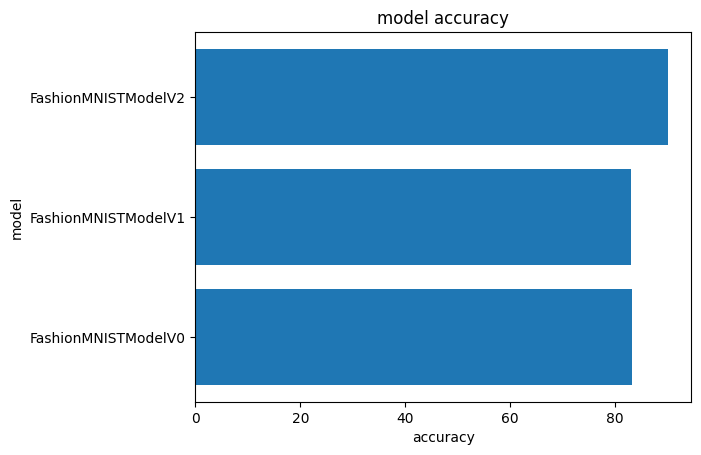

In [ ]:

import matplotlib.pyplot as plt

plt.barh(df['model name'], df['accuracy'])
plt.ylabel('model')
plt.xlabel('accuracy')
plt.title('model accuracy')
plt.show()


#Selecting 9 random samples from `test_data` with labels for making predictions

In [ ]:
import random

# Selecting 9 random samples & labels from "test_data" for making predictions
# ---> imp ---> random.sample() only works with list, tuple, or str — not dataset objects

test_samples=[]
test_labels=[]

for samples, labels in random.sample(list(Test_data), k=9):  # Test_data is not a list — even though it acts like one (you can index it, but it’s not technically a list).
  test_samples.append(samples)
  test_labels.append(labels)


print('image shape:',test_samples[0].shape), test_labels

image shape: torch.Size([1, 28, 28])


(None, [5, 2, 2, 2, 2, 6, 6, 7, 9])

Text(0.5, 1.0, 'Sandal')

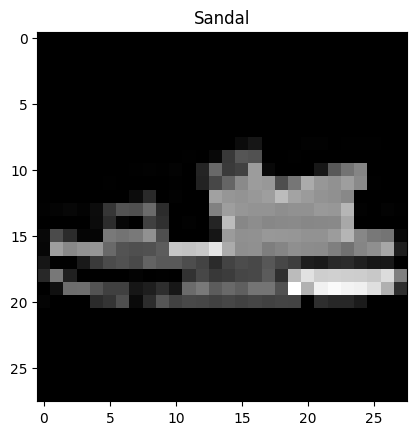

In [ ]:
plt.imshow( test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])


#Making Predictions with those 9 random samples and compare preds with labels

In [ ]:
# making Preds with those 9 random samples ad compare preds with labels

preds=[]  # extracting pred(prediction label) to here

model_2.eval()
with torch.inference_mode():

  for samples in test_samples:
    samples= samples.to(device).unsqueeze(dim=1)

    # forward pass for real pred
    pred_logits= model_2(samples)
    pred= torch.softmax(pred_logits, dim=1).argmax(dim=1)

    # append / extract them
    preds.append(pred.cpu().item())

print(preds, '\n',preds == test_labels , '\n', preds[:4])

[5, 2, 2, 6, 2, 0, 4, 7, 9] 
 False 
 [5, 2, 2, 6]


#Plotting the  `pred labels` and `true labels` with `test_sample(image)`

torch.Size([1, 28, 28])
5 5 True


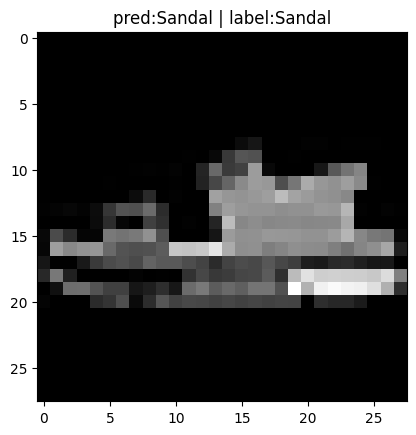

In [ ]:

# using test_samples(ing) ,test_labels(true label) and comparing with pred(pred label) of our trained model.

# plotting
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(f'pred:{ class_names[preds[0]] } | label:{ class_names[test_labels[0]] }')

# img shape and check pred label and true label
print(test_samples[0].shape)
print(preds[0], test_labels[0], preds[0]==test_labels[0] ) #prediction is correct of test sample img


#Plotting the random 9 images, pred labels and true labels

9


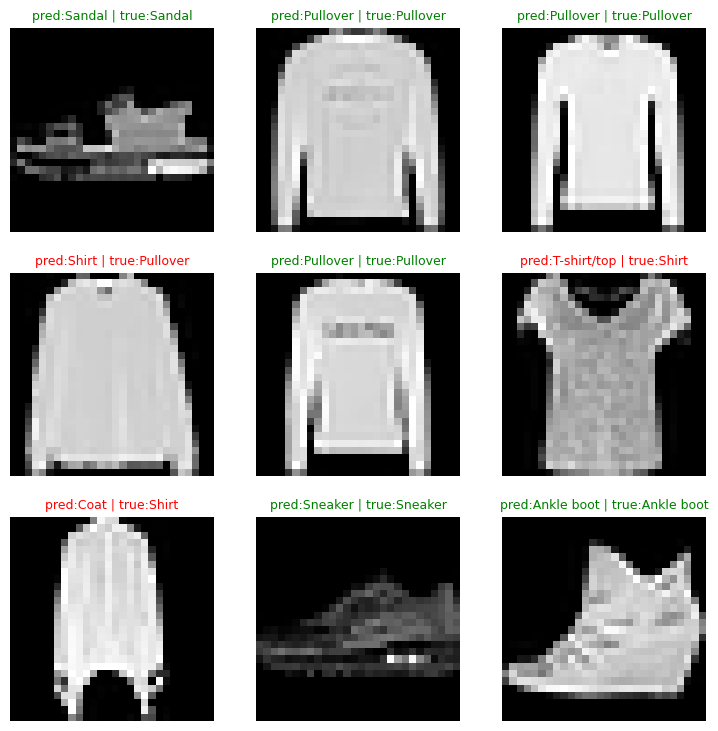

In [ ]:
print(len(test_samples))

plt.figure(figsize=(9,9))

for i , sample in enumerate(test_samples):

  plt.subplot(3,3, i+1)
  plt.imshow(sample.squeeze(), cmap='grey')

  if preds[i] is not test_labels[i]: # Accessing the correct predicted label from the list
    plt.title(f'pred:{ class_names[preds[i]] } | true:{ class_names[test_labels[i]] }', c='red', fontsize=9)
  else:
    plt.title(f'pred:{ class_names[preds[i]] } | true:{class_names[test_labels[i]] }', c='green', fontsize=9)


  plt.axis(False)

#***Making Predictions with Test data***

In [ ]:
  # 1. Make predictions with trained model

pred_labels= []

model_2.eval()
with torch.inference_mode():
   for x,y in tqdm(test_dataloader, desc='it is loading'):
    x, y=x.to(device), y.to(device)

    # forward pass
    pred_logits= model_2(x)
    y_pred= torch.softmax(pred_logits, dim=1).argmax(dim=1)

    pred_labels.append(y_pred.cpu())

# pred_labels will be in batches of 32
pred_label_tenor= torch.cat(pred_labels) # This(torch.cat) combines all batch predictions into one long tensor, so you can: Compare with all test labels.

pred_label_tenor   # <<<<------------------------------------------------------- OUR PREDICTIONS <------- IMP


it is loading:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
len(pred_label_tenor) , len(Test_data.targets), pred_label_tenor[:10], Test_data.targets[:10]

(10000,
 10000,
 tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]))

#plotting confusion metric for better visualization

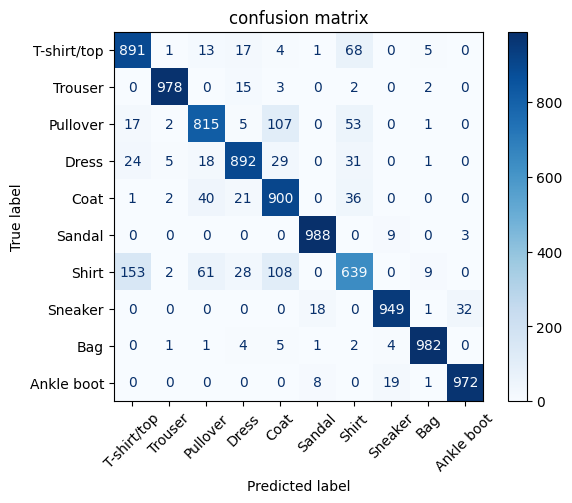

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confmat_tensor= confusion_matrix(Test_data.targets, pred_label_tenor)
confmat_tensor
# Optional: visualize

display= ConfusionMatrixDisplay(confusion_matrix= confmat_tensor, display_labels=class_names)
display.plot(cmap='Blues', xticks_rotation=45)
plt.title('confusion matrix')
plt.show()



#***Saving `torch.save()`*** the model parameters

In [ ]:
from pathlib import Path

Model_weights = Path('Model_weights')
Model_weights.mkdir(parents=True, exist_ok=True)

torch.save(model_2.state_dict(), Model_weights/'weights.pth')

#***Loading `torch.load()`*** the saved model parameters

In [ ]:
# to load the saved model you have to first instantiate the model

loaded_model_2= FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape= len(class_names)).to(device)
loaded_model_2.load_state_dict(torch.load( Model_weights/'weights.pth' ))

loaded_model_2

FashionMNISTModelV2(
  (conv_layer_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_

###matching the loaded model results with model_2

In [ ]:
loaded_model_2_results= model_eval(loaded_model_2, test_dataloader, loss_fn, accuracy_fn)

print(loaded_model_2_results,'\n\n',model_2_result)

{'model name': 'FashionMNISTModelV2', 'loss': 0.28063002098411227, 'accuracy': 90.0758785942492} 

 {'model name': 'FashionMNISTModelV2', 'loss': 0.28063002098411227, 'accuracy': 90.0758785942492}


In [ ]:
torch.isclose(torch.tensor(model_2_result['loss']),
              torch.tensor(loaded_model_2_results['loss']),
              atol=0.001)

tensor(True)